In [1]:
%%HTML
<img src='codes.jpg'>

In [2]:
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib notebook

In [3]:
from scipy.interpolate import interp1d
from copy import deepcopy

In [4]:
def integrate(data):
    data_int = deepcopy(data)
    for block in data_int:
        for signal_type in data_int[block]:
            for axis in data_int[block][signal_type]:
                for obs_ind in range(len(data_int[block][signal_type][axis])):
                    data_int[block][signal_type][axis][obs_ind] = np.cumsum(data_int[block][signal_type][axis][obs_ind])
    return data_int

In [5]:
def read_data(filename):
    data = {}
    with open(filename, 'rb') as csvfile:
        reader = csv.reader(csvfile, delimiter=',', quotechar='|')
        for row in reader:
            block = row[-1][1:]
            if block.isdigit():
                block = int(block)
            del row[-1]
            del row[0]
            if not block in data:
                data[block] = {}
                data[block]['gyr'] = {}
                data[block]['acc'] = {}
                data[block]['gyr']['x'] = []
                data[block]['gyr']['y'] = []
                data[block]['gyr']['z'] = []
                data[block]['acc']['x'] = []
                data[block]['acc']['y'] = []
                data[block]['acc']['z'] = []
            frow = np.array(map(float, row))
            data[block]['acc']['x'].append(np.array(frow[range(0,len(row),6)]))
            data[block]['acc']['y'].append(np.array(frow[range(1,len(row),6)]))
            data[block]['acc']['z'].append(np.array(frow[range(2,len(row),6)]))
            data[block]['gyr']['x'].append(np.array(frow[range(3,len(row),6)]))
            data[block]['gyr']['y'].append(np.array(frow[range(4,len(row),6)]))
            data[block]['gyr']['z'].append(np.array(frow[range(5,len(row),6)]))
    return data

In [6]:
def plot_block_signal(data, n_block, x_range, y_range):
    fig = plt.figure(figsize=(10, 5))
    gyr_x = fig.add_subplot(231)
    for series in data[n_block]['gyr']['x']:
        gyr_x.plot(series, 'b', linewidth=3, alpha=0.5)
    gyr_x.set_title('x')
    gyr_x.set_ylabel('Gyroscope')
    gyr_x.set_xlim(x_range)
    gyr_x.set_ylim(y_range)
    gyr_y = fig.add_subplot(232)
    for series in data[n_block]['gyr']['y']:
        gyr_y.plot(series, 'r', linewidth=3, alpha=0.5)
    gyr_y.set_title('y')
    gyr_y.set_xlim(x_range)
    gyr_y.set_ylim(y_range)
    gyr_z = fig.add_subplot(233)
    for series in data[n_block]['gyr']['z']:
        gyr_z.plot(series, 'g', linewidth=3, alpha=0.5)
    gyr_z.set_title('z')
    gyr_z.set_xlim(x_range)
    gyr_z.set_ylim(y_range)
    acc_x = fig.add_subplot(234)
    for series in data[n_block]['acc']['x']:
        acc_x.plot(series, 'b', linewidth=3, alpha=0.5)
    acc_x.set_title('x')
    acc_x.set_ylabel('Accelerometer')
    acc_x.set_xlim(x_range)
    acc_x.set_ylim(y_range)
    acc_y = fig.add_subplot(235)
    for series in data[n_block]['acc']['y']:
        acc_y.plot(series, 'r', linewidth=3, alpha=0.5)
    acc_y.set_title('y')
    acc_y.set_xlim(x_range)
    acc_y.set_ylim(y_range)
    acc_z = fig.add_subplot(236)
    for series in data[n_block]['acc']['z']:
        acc_z.plot(series, 'g', linewidth=3, alpha=0.5)
    acc_z.set_title('z')
    acc_z.set_xlim(x_range)
    acc_z.set_ylim(y_range)
    plt.show()
    
def plot_block_gest(data, n_block):
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(121, projection='3d')
    for ind in range(len(data[n_block]['gyr']['x'])):
        ax.plot(data[n_block]['gyr']['x'][ind], data[n_block]['gyr']['y'][ind], data[n_block]['gyr']['z'][ind])
    ax.set_title('Gyroscope')
    ax = fig.add_subplot(122, projection='3d')
    for ind in range(len(data[n_block]['acc']['x'])):
        ax.plot(data[n_block]['acc']['x'][ind], data[n_block]['acc']['y'][ind], data[n_block]['acc']['z'][ind])
    ax.set_title('Accelerometer')
    plt.show()

In [7]:
phone1 = read_data('phone1.csv') # Your data
phone2 = read_data('phone2.csv') # My data (I dont have a gyroscope)

<IPython.core.display.Javascript object>


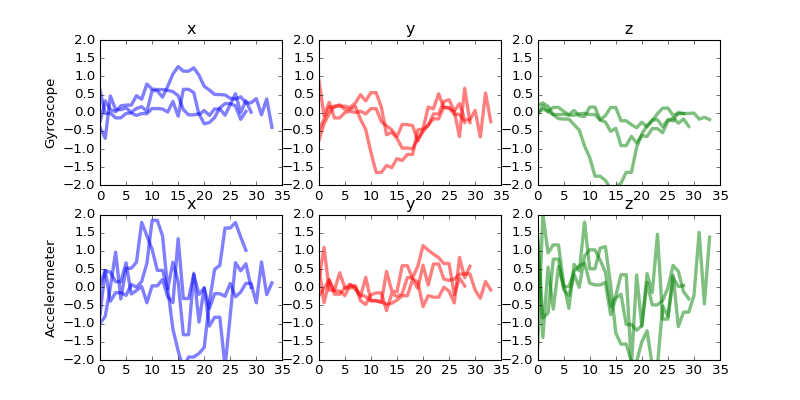

<IPython.core.display.Javascript object>


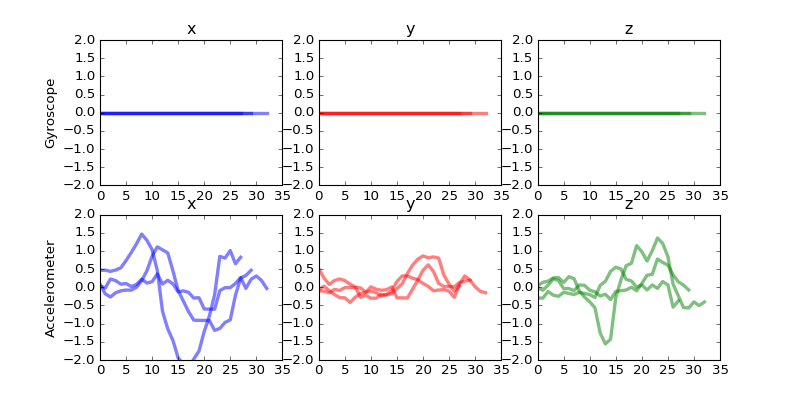

In [8]:
plot_block_signal(phone1, 16, [0,35], [-2,2]) 
plot_block_signal(phone2, 16, [0,35], [-2,2])

<IPython.core.display.Javascript object>


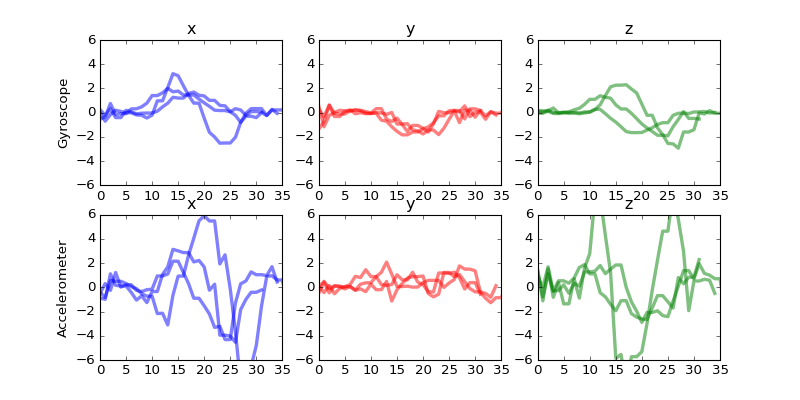

<IPython.core.display.Javascript object>


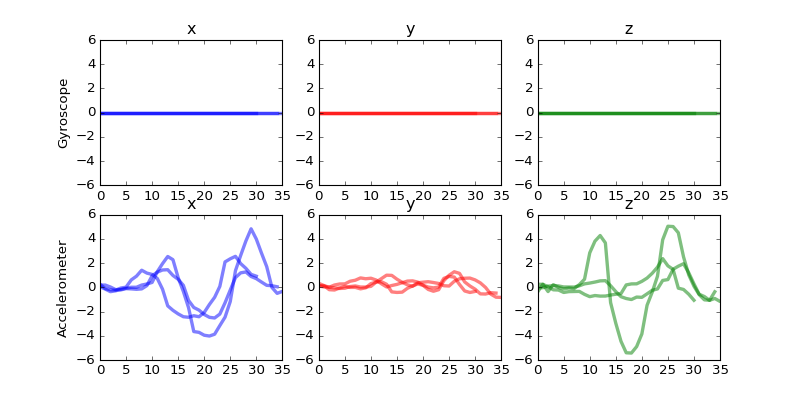

In [9]:
plot_block_signal(phone1, 1, [0,35], [-6,6]) 
plot_block_signal(phone2, 1, [0,35], [-6,6])